# Lending Club Case Study Assignment by:  

*   Ganaraja Maniyoor
*   Rahul Batra

#### 1. Data Understanding: Data Quality Issues and Initial interpretation of the fields




##### 1.A. Data Understanding: Data Quality Issues Identified:
*   Columns with missing values
*   Columns with sames values for all rows in a single column
*   Columns with all values as null
*   Also some columns have %, months, addtional text at the end of the values.
    These need to be converted to nuerical values.  
*   Further, some columsn were object like 'issue_d', etc. were of type  
     object, which have neen fixed


##### 1.B. Data Understanding: Initial Understanding:
From a loan domain perspective, some key fields apprear to me more important than others (initial hypothesis):
*   Grade and Sub-grade: Existing method of Loan Company to grade the status on the loan typically has a strong bearing on loan status
*   home_ownership: Depending on the ownership status, the expectation is that
    people with owned homes would have lower default.   
*   loan_amnt: the amount of loan that the person has relative to his income   
    can have a strong bearing on the loan status
*   purpose: May be the purpose of loan can also have a strong bearing on the loan status.









##### 1.B. Data Understanding: Initial interpretation of the fields

#### 2. Import the libraries, set options





In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 3. Load & Preview the data

In [2]:
# read the loan.csv nd and preview the header
loan = pd.read_csv('/content/loan.csv')
# print(loan.head())

In [ ]:
# print Original Shape of Loan
print('Original Shape of Loan DF is', loan.shape)

Original Shape of Loan DF is (39717, 111)


In [ ]:
# Getting the details of the original Loan DF and the fields
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### 4. Cleaning the data

##### 4.1. Cleaning fields with null-value and having same value

In [ ]:
# get and drop all columns which are completly null
nan_cols = [i for i in loan.columns if loan[i].isnull().all()]
print(nan_cols)
loan.drop(nan_cols, axis=1, inplace=True)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [ ]:
# this code will help in getting the columns which have only one value for all fields,
# Since they do not contribute to the analysis, they are being deleted

single_valued_cols = [i for i in loan.columns if loan[i].nunique() == 1]
print(single_valued_cols)
loan.drop(single_valued_cols, axis=1, inplace=True)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [ ]:
print('Revised Shaped of Loan DF is', loan.shape)

Revised Shaped of Loan DF is (39717, 48)


In [ ]:
# Getting the details of the partially cleansed Loan DF
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### 4.2. Cleaning: Addressing Missing Values


In [ ]:
# Finding the list of columns with missing values
missing_cols = loan.columns[loan.isnull().any()].tolist()
print(missing_cols)

['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


In [ ]:
# emp_title - This reflects the name of the company where the person is working.
# Deleting these rows with missing values in this may delete relevant data
# hence putting 'Others' as replacement
print('Missing Values for emp_tile are', loan['emp_title'].isnull().sum())
loan['emp_title'].fillna('Others', inplace=True)


Missing Values for emp_tile are 2459


In [ ]:
# emp_length can be important factor in determining the loan default.
# the choice is whether to delete or fill will mode/median
# we are chosing delete as the values are too less (1075 are missing and that too 229 values with only charged off status )
print('Missing Values for emp_tile are', loan['emp_length'].isnull().sum())
loan.dropna(subset=['emp_length'], inplace=True)


Missing Values for emp_tile are 1072


In [ ]:
# desc - This reflects the loan description by borrower.
# Deleting these rows with missing values may not make sense as the bearing of
# this field is not very high, hence putting 'Others' as replacement
print('Missing Values for emp_tile are', loan['desc'].isnull().sum())
loan['desc'].fillna('Others', inplace=True)


In [ ]:
# title - This reflects the loan title by borrower.
# Deleting these rows with missing values may not make sense as the bearing of
# this field is not very high, hence putting 'Others' as replacement
# also missing values are too small
print('Missing Values for title are', loan['title'].isnull().sum())
loan['title'].fillna('Others', inplace=True)

Missing Values for title are 11


In [ ]:
# mths_since_last_delinq missing values
# Out of the 25682 missing (there are total charged off values are 5628 in full df).
# the missing values for this column
# with charged off are 3486 (which is more than 50%)
# we will replace with a value which is not there in exiting data (-1)
print('Missing Values for mths_since_last_delinq are', loan['mths_since_last_delinq'].isnull().sum())
loan['mths_since_last_delinq'].fillna(-1, inplace=True)

Missing Values for mths_since_last_delinq are 25682


In [ ]:
# mths_since_last_record missing values (total missing are 36931)
# there are total charged off values are 5628 in full df
# 5050 records of charged off are with missing values

print('Missing Values for mths_since_last_record are', loan['mths_since_last_record'].isnull().sum())
loan['mths_since_last_record'].describe()
# we would ingore this field considering that so many missing values are there
# for charged off. The impact of this field may not be there.
loan.drop('mths_since_last_record', axis=1, inplace=True)

Missing Values for mths_since_last_record are 36931


In [ ]:
# revol_util missing value (50 values are missing)
# we will delete these rows with missing values as the missing values are too small
print('Missing Values for revol_util are', loan['revol_util'].isnull().sum())
loan.dropna(subset=['revol_util'], inplace=True)



Missing Values for revol_util are 50


In [ ]:
# last_pymnt_d (only 62 rows are with missing values)
# we can delete these rows
print('Missing Values for last_pymnt_d are', loan['last_pymnt_d'].isnull().sum())
loan.dropna(subset=['last_pymnt_d'], inplace=True)

Missing Values for last_pymnt_d are 62


In [ ]:
# next_pymnt_d (total missing is 37497)
# these are too many missing values
# we would ingore this field considering that so many missing values are there
# for charged off. The impact of this field may not be there.
print('Missing Values for next_pymnt_d are', loan['next_pymnt_d'].isnull().sum())
loan.drop('next_pymnt_d', axis=1, inplace=True)

Missing Values for next_pymnt_d are 37497


In [ ]:
# last_credit_pull_d (total missing is 2)
# we can delete these rows
print('Missing Values for last_credit_pull_d are', loan['last_credit_pull_d'].isnull().sum())
loan.dropna(subset=['last_credit_pull_d'], inplace=True)

Missing Values for last_credit_pull_d are 2


In [ ]:
# pub_rec_bankruptcies (total missing are 696)
# With charged off loan status is 111 in original and now 0
# we can delete these rows
print('Missing Values for last_credit_pull_d are', loan['pub_rec_bankruptcies'].isnull().sum())
# loan[(loan['pub_rec_bankruptcies'].isnull() & loan['loan_status'] == 'Charged Off')].shape
# loan[(loan['pub_rec_bankruptcies'].isnull() & loan['loan_status'] != 'Charged Off')].shape
loan.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

Missing Values for last_credit_pull_d are 696


In [ ]:
# re-indexing
loan.reset_index(inplace=True)

In [ ]:
# Finding the list of columns with missing values
missing_cols = loan.columns[loan.isnull().any()].tolist()
print(missing_cols)

[]


##### 4.3. Cleaning: Removing Units, Type as Date and Converting to Numerical

In [ ]:
# column 'term' is having months in the last part of the field. removing that 'months'
loan['term'] = loan['term'].str.rstrip(' months').astype(int)


In [ ]:
# column int_rate is having % in the last part of the field. removing that %
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')

In [ ]:
# column revol_util is having % in the last part of the field. removing that %
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')

In [ ]:
# coverting dates to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')


In [ ]:
# creating an int value for grade (for corr - coef analysis)
loan['gradeInt'] = loan['grade'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}).astype(int)


In [ ]:
# creating an int value for sub-grade (for corr - coef analysis)
loan['sub_gradeInt'] = loan['sub_grade'].str[0].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})
loan['sub_gradeInt'] = loan['sub_gradeInt'].astype(str) + loan['sub_grade'].str[1]
loan['sub_gradeInt'] = loan['sub_gradeInt'].astype(int)

In [ ]:
# creating an int value for sub-grade (for corr - coef analysis)
loan['loan_statusInt'] = loan['loan_status'].map({'Fully Paid':3, 'Current':2, 'Charged Off':1}).astype(int)

In [ ]:
# creating an int value for sub-grade (for corr - coef analysis)
loan['home_ownershipInt'] = loan['home_ownership'].map({'OWN':3, 'MORTGAGE':2, 'RENT':1, 'OTHER':0}).astype(int)

In [ ]:
# emp_length to be fixed to make is into inteter
loan['emp_length'] = loan['emp_length'].str.rstrip(' years')
loan['emp_length'] = loan['emp_length'].str.rstrip(' year')
loan['emp_length'] = loan['emp_length'].str.rstrip('+')
loan['emp_length'] = loan['emp_length'].str.rstrip('<')
loan['emp_length'] = loan['emp_length'].str.rstrip('< ')
loan['emp_length'] = loan['emp_length'].str.rstrip(' ')
loan['emp_length'] = loan['emp_length'].str.replace('< 1', '1')
loan['emp_length'] = loan['emp_length'].astype(int)
loan['emp_length'].value_counts()

,count
emp_length,
10,8750
1,7530
2,4293
3,4023
4,3377
5,3235
6,2193
7,1747
8,1449


In [ ]:
loan.reindex()


##### 4.4 Cleaning: Standardizing, Fix In-valid fields

In [ ]:
#get the details of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37835 non-null  int64         
 1   member_id                37835 non-null  int64         
 2   loan_amnt                37835 non-null  int64         
 3   funded_amnt              37835 non-null  int64         
 4   funded_amnt_inv          37835 non-null  float64       
 5   term                     37835 non-null  int64         
 6   int_rate                 37835 non-null  float64       
 7   installment              37835 non-null  float64       
 8   grade                    37835 non-null  object        
 9   sub_grade                37835 non-null  object        
 10  emp_title                37835 non-null  object        
 11  emp_length               37835 non-null  int64         
 12  home_ownership           37835 n

In [ ]:
# checking that the key numbers are not negative
print('revol_bal neg count', loan['revol_bal'][loan['revol_bal'] < 0].count())
print('last_pymnt_amnt neg count', loan['last_pymnt_amnt'][loan['last_pymnt_amnt'] < 0].count())
print('total_pymnt neg count', loan['total_pymnt'][loan['total_pymnt'] < 0].count())
print('total_pymnt_inv neg count', loan['total_pymnt_inv'][loan['total_pymnt_inv'] < 0].count())
print('total_rec_prncp neg count', loan['total_rec_prncp'][loan['total_rec_prncp'] < 0].count())
print('total_rec_int neg count', loan['total_rec_int'][loan['total_rec_int'] < 0].count())
print('total_rec_late_fee neg count', loan['total_rec_late_fee'][loan['total_rec_late_fee'] < 0].count())
print('last_pymnt_amnt neg count', loan['last_pymnt_amnt'][loan['last_pymnt_amnt'] < 0 ].count())
print('recoveries neg count', loan['recoveries'][loan['recoveries'] < 0].count())
print('collection_recovery_fee neg count', loan['collection_recovery_fee'][loan['collection_recovery_fee'] < 0].count())
print('out_prncp neg count', loan['out_prncp'][loan['out_prncp'] < 0].count())
print('out_prncp_inv neg count', loan['out_prncp_inv'][loan['out_prncp_inv'] < 0].count())
print('pub_rec_bankruptcies neg count', loan['pub_rec_bankruptcies'][loan['pub_rec_bankruptcies'] < 0].count())

revol_bal neg count 0
last_pymnt_amnt neg count 0
total_pymnt neg count 0
total_pymnt_inv neg count 0
total_rec_prncp neg count 0
total_rec_int neg count 0
total_rec_late_fee neg count 0
last_pymnt_amnt neg count 0
recoveries neg count 0
collection_recovery_fee neg count 0
out_prncp neg count 0
out_prncp_inv neg count 0
pub_rec_bankruptcies neg count 0


In [ ]:
# funded_amnt_inv has values like 0.000121098, etc. This can be rounded off with int

loan[loan['funded_amnt_inv'] < 1]['funded_amnt_inv'].describe()

loan['funded_amnt_inv'] = loan['funded_amnt_inv'].astype(int)

# loan_amnt >=	funded_amnt
# annual_inc not equal to zero

In [ ]:
# for revol_util cannot be greater than 0 where revol_bal is 0
# choice is to delete these 76 rows or make revol_util as 0
# none of the charged off are in this filter and delete these rows
loan['revol_util'][(loan['revol_bal'] ==  0) & (loan['revol_util'] > 0) & loan['loan_status'] == 'Charged Off'].count()

revol0 = loan[(loan['revol_bal'] ==  0) & (loan['revol_util'] > 0)].index

loan.drop(revol0, axis=0, inplace=True)

In [ ]:
# check if loan_amnt >=	funded_amnt (loan amt should alway be greater than funded)
#  no values for the same
loan[loan['loan_amnt'] < loan['funded_amnt']].shape

(0, 51)

In [ ]:
# check for annual_inc not equal to 0 (no such rows exist)
loan[loan['annual_inc'] == 0].shape

(0, 51)

##### 4.5 Cleaning: Derived Variables

In [ ]:
#  loan amount to annual income ratio would be good to capture how much loan is
#  there vs the income

loan['loan_to_income_ratio'] = loan['loan_amnt'] * 100 / loan['annual_inc']


In [ ]:
# revol_bal to  annual income ratio would be good to capture how much revol is
# there vs income
loan['rev_bal_to_income_ratio'] = loan['revol_bal'] * 100 / loan['annual_inc']

In [ ]:
# revol_bal * ultization /  annual incomewould be good to capture how much revol is
# there vs income
loan['rev_bal_util_to_income_ratio'] = loan['revol_bal'] * loan['revol_util']  / loan['annual_inc']


In [ ]:
# installment /  annual income would be good to capture how much installment is
# there vs income
loan['installment_to_income_ratio'] = loan['installment'] * 100  / loan['annual_inc']


#### 5. Analyze the data

##### 5.1. Analyze: Univariate and Bi-variate: Columns with Best Linkage to Loan Default

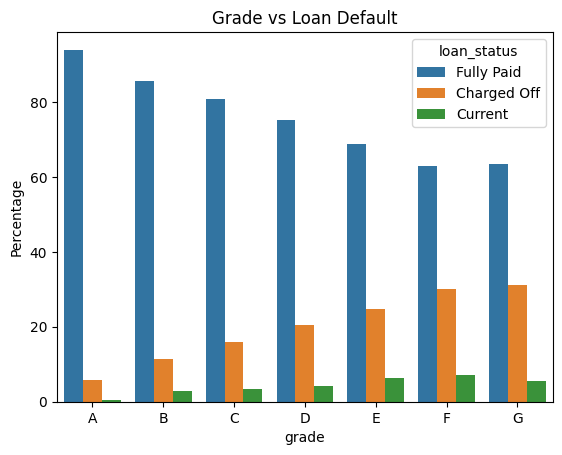

In [ ]:
# grade field: reflects LC assigned loan grade
# this field has the best relation to loan default
# as we can clearly see that the with grade increase the charged off % is
# also increasing

loan_per_loanstatus_grade = loan.groupby(['grade'])['loan_status'].value_counts(normalize
                                                                                =True).reset_index()
loan_per_loanstatus_grade ['proportion'] = loan_per_loanstatus_grade ['proportion'] * 100

sns.barplot(hue='loan_status', x='grade', y='proportion', data=loan_per_loanstatus_grade ,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.ylabel("Percentage")
plt.title("Grade vs Loan Default")
plt.show()

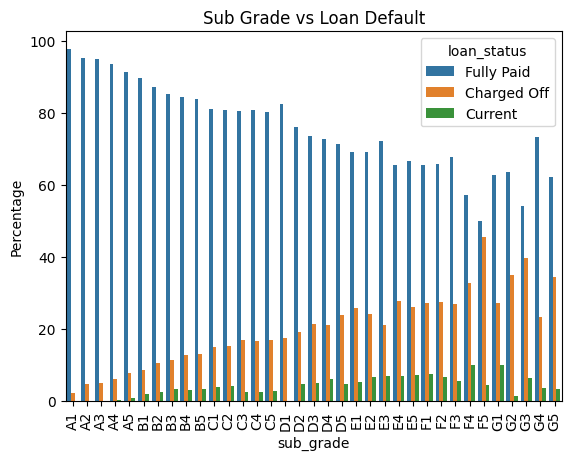

In [ ]:
# sub_grade field: reflects LC assigned loan subgrade
# this field has the best relation to loan default
# as we can clearly see that the with grade increase the charged off % is
# also increasing
loan_per_loanstatus_subgrade = loan.groupby(['sub_grade'])['loan_status'].value_counts(normalize
                                                                                =True).reset_index()
loan_per_loanstatus_subgrade ['proportion'] = loan_per_loanstatus_subgrade ['proportion'] * 100

# print(loan_per)
sns.barplot(hue='loan_status', x='sub_grade', y='proportion', data=loan_per_loanstatus_subgrade ,
            order=['A1', 'A2', 'A3', 'A4', 'A5',
                   'B1', 'B2', 'B3', 'B4', 'B5',
                   'C1', 'C2', 'C3', 'C4', 'C5',
                   'D1', 'D2', 'D3', 'D4', 'D5',
                   'E1', 'E2', 'E3', 'E4', 'E5',
                   'F1', 'F2', 'F3', 'F4', 'F5',
                   'G1', 'G2', 'G3', 'G4', 'G5'], hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Sub Grade vs Loan Default")
plt.show()

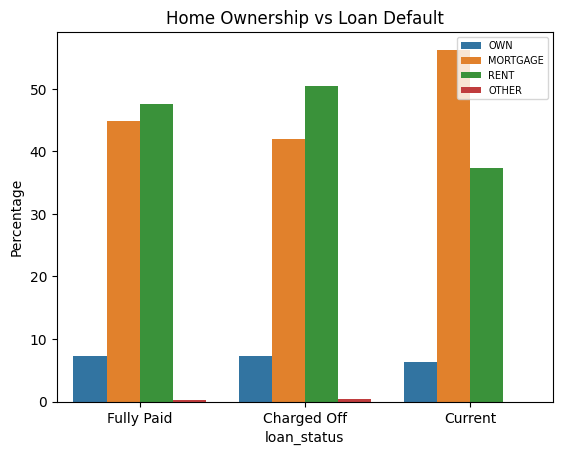

In [ ]:
# home_ownership field: reflects the type of home than the applicant has.
# This has some bearing to the Charged Off (Default) status where we see that
# rental home application have a higher % in charged off

loan_per_loanstatus_homeO = loan.groupby(['loan_status'])['home_ownership'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_homeO ['proportion'] = loan_per_loanstatus_homeO ['proportion'] * 100

# print(loan_per_loanstatus_homeO)
sns.barplot(x='loan_status', hue='home_ownership', y='proportion', data=loan_per_loanstatus_homeO,
            order=['Fully Paid', 'Charged Off', 'Current'], hue_order=['OWN', 'MORTGAGE', 'RENT', 'OTHER'])
plt.legend(fontsize='7', loc='upper right')
plt.ylabel("Percentage")
plt.title("Home Ownership vs Loan Default")
plt.show()

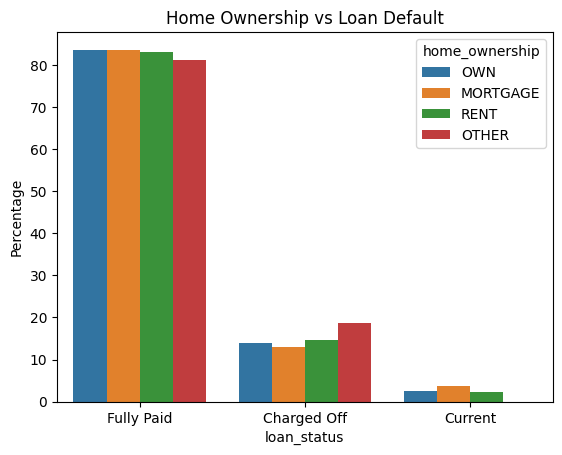

In [ ]:
# home_ownership field: reflects the type of home than the applicant has.
# This has some bearing to the Charged Off (Default) status where we that Other
# (which were the rows with empty value) have a high possibility of default

loan_per_loanstatus_homeO = loan.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_homeO ['proportion'] = loan_per_loanstatus_homeO ['proportion'] * 100

# print(loan_per_loanstatus_homeO)
sns.barplot(x='loan_status', hue='home_ownership', y='proportion', data=loan_per_loanstatus_homeO,
            hue_order=['OWN', 'MORTGAGE', 'RENT', 'OTHER'])
plt.ylabel("Percentage")
plt.title("Home Ownership vs Loan Default")
plt.show()

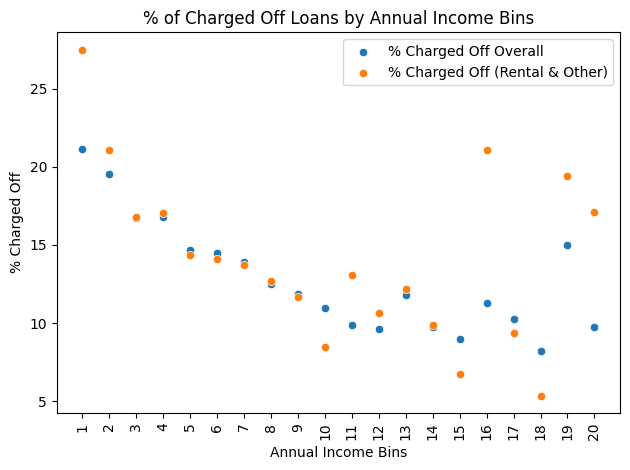

In [ ]:
# Looking deeper on rental and other records with other fields - starting with home ownership and annual income bins

charged_off_overall = loan.groupby('annual_inc_bin')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'] * 100
charged_off_rental = loan[(loan['home_ownership'] == 'RENT') | (loan['home_ownership'] == 'OTHER')].groupby(
    'annual_inc_bin')['loan_status'].value_counts(normalize=True).unstack()['Charged Off'] * 100

sns.scatterplot(x=charged_off_overall.index.astype(str), y=charged_off_overall.values, label='% Charged Off Overall')
sns.scatterplot(x=charged_off_rental.index.astype(str), y=charged_off_rental.values, label='% Charged Off (Rental & Other)')

plt.xlabel('Annual Income Bins')
plt.ylabel('% Charged Off')
plt.title('% of Charged Off Loans by Annual Income Bins')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

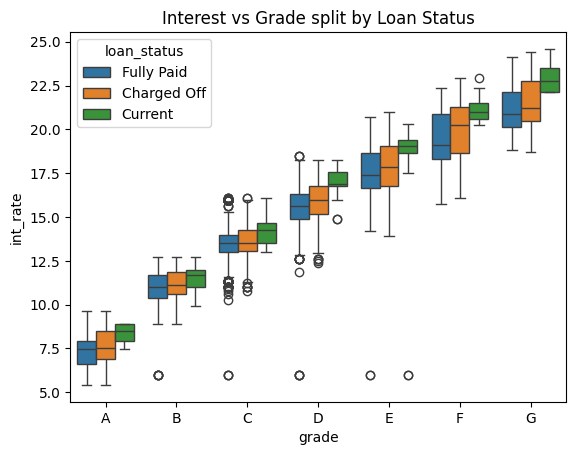

In [ ]:
# grade field: reflects LC assigned loan grade
# interest : reflects the interest for the loan applied
# these two fields are related as interest increases along with grade.


sns.boxplot(y='int_rate', x='grade', hue='loan_status', data=loan,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue_order=['Fully Paid', 'Charged Off', 'Current'])

plt.title("Interest vs Grade split by Loan Status")
plt.show()

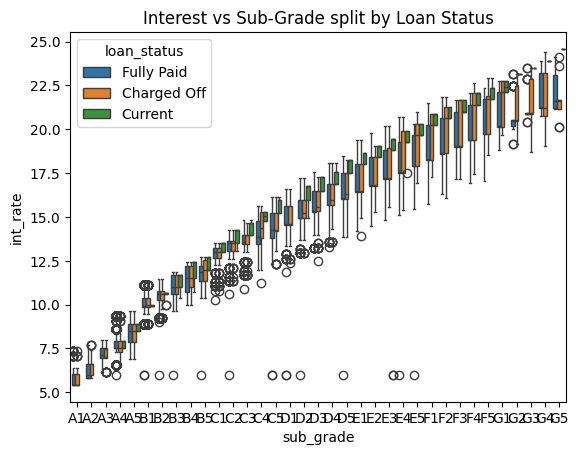

In [ ]:
#just like grade, sub grade also has the same effect on the interest

sns.boxplot(y='int_rate', x='sub_grade', hue='loan_status', data=loan,
             order=['A1', 'A2', 'A3', 'A4', 'A5',
                   'B1', 'B2', 'B3', 'B4', 'B5',
                   'C1', 'C2', 'C3', 'C4', 'C5',
                   'D1', 'D2', 'D3', 'D4', 'D5',
                   'E1', 'E2', 'E3', 'E4', 'E5',
                   'F1', 'F2', 'F3', 'F4', 'F5',
                   'G1', 'G2', 'G3', 'G4', 'G5'], hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.title("Interest vs Sub-Grade split by Loan Status")
plt.show()

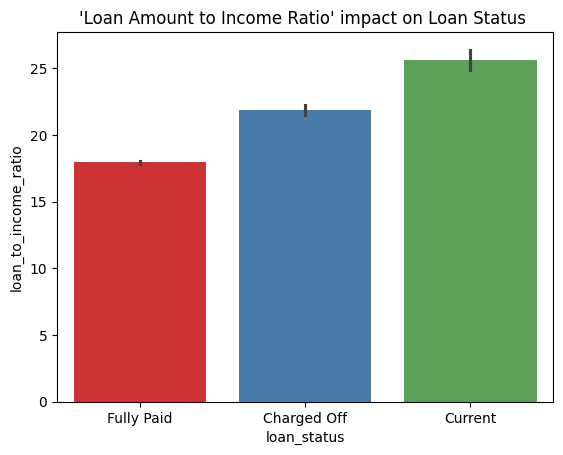

In [ ]:
# loan_to_income_ratio: Derived field: Reflects on the ability of the person to
# pay the loan amount in relation to the income

sns.barplot(y='loan_to_income_ratio', x='loan_status', data=loan, palette='Set1')
plt.title("'Loan Amount to Income Ratio' impact on Loan Status ")
plt.show()

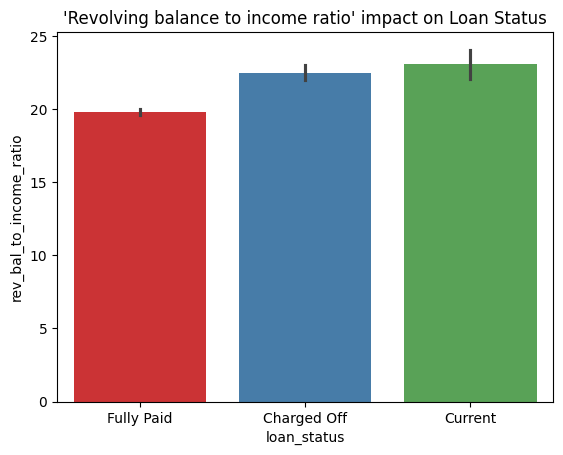

In [ ]:
# rev_bal_to_income_ratio: Derived field: reflects on the ability of the person
# to pay the loan consider the “Total credit revolving balance” in relation to the income
sns.barplot(y='rev_bal_to_income_ratio', x='loan_status', data=loan, palette='Set1')
plt.title("'Revolving balance to income ratio' impact on Loan Status")
plt.show()

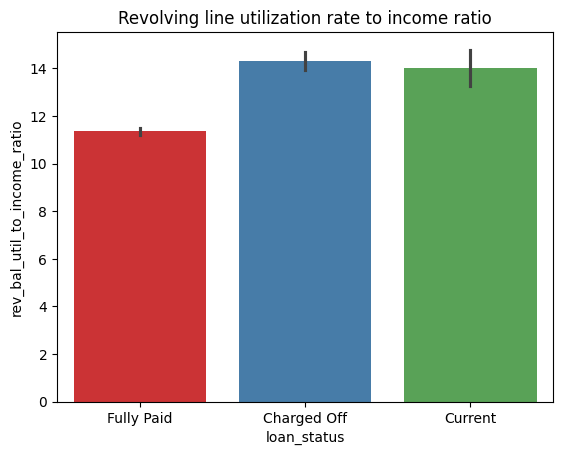

In [ ]:
# rev_bal_util_to_income_ratio: Reflects on the ability of the person to pay the loan
# consider the “Revolving line utilization rate” in relation to the balance and income.
sns.barplot(y='rev_bal_util_to_income_ratio', x='loan_status', data=loan, palette='Set1')
plt.title("Revolving line utilization rate to income ratio")
plt.show()

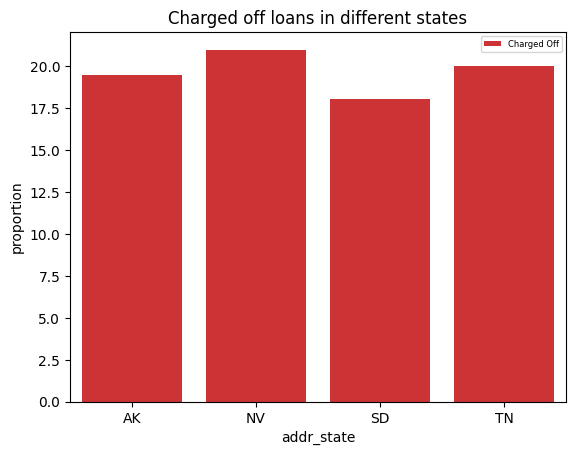

In [ ]:
#getting the proportion of the charged off loans on different states
loan_per_loanstatus_state = loan.groupby(['addr_state'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_state ['proportion'] = loan_per_loanstatus_state ['proportion'] * 100

loan_per_loanstatus_state = loan_per_loanstatus_state[loan_per_loanstatus_state['loan_status'] == 'Charged Off'] # fix this formulae
loan_per_loanstatus_state = loan_per_loanstatus_state[loan_per_loanstatus_state['proportion'] > 17.5]

# print(loan_per_loanstatus_state)
sns.barplot(hue='loan_status', x='addr_state', y='proportion',
            data=loan_per_loanstatus_state, palette = 'Set1')
plt.legend(fontsize='6', loc='upper right')
plt.title("Charged off loans in different states")
plt.show()

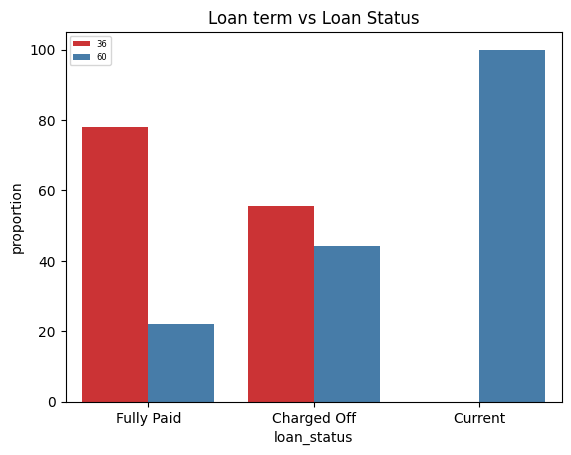

In [ ]:
# comparing the loan term and loan status based on propotion
loan_per_loanstatus_term = loan.groupby(['loan_status'])['term'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_term ['proportion'] = loan_per_loanstatus_term ['proportion'] * 100

sns.barplot(hue='term', x='loan_status', y = 'proportion', data=loan_per_loanstatus_term, palette='Set1',
            order = ['Fully Paid', 'Charged Off', 'Current'])
plt.legend(fontsize='6', loc='upper left')
plt.title("Loan term vs Loan Status")
plt.show()

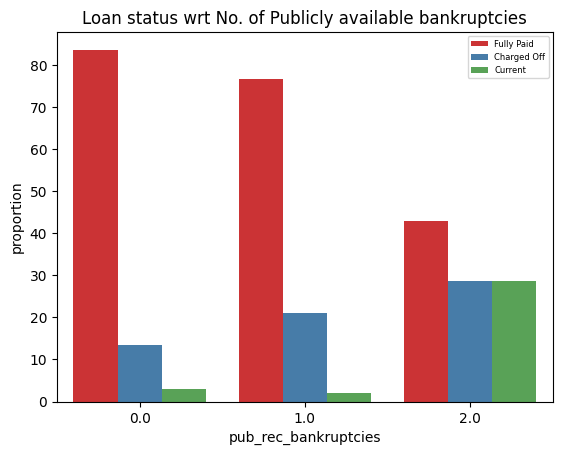

In [ ]:
# pub_rec_bankruptcies is the denomitor of publicly available bankruptcies details of the loan applicant
loan_per_loanstatus_pub_rec_bankruptcies = loan.groupby(['pub_rec_bankruptcies'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_pub_rec_bankruptcies ['proportion'] = loan_per_loanstatus_pub_rec_bankruptcies ['proportion'] * 100

sns.barplot(hue='loan_status', x='pub_rec_bankruptcies', y = 'proportion', data=loan_per_loanstatus_pub_rec_bankruptcies, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.title("Loan status wrt No. of Publicly available bankruptcies")
plt.show()

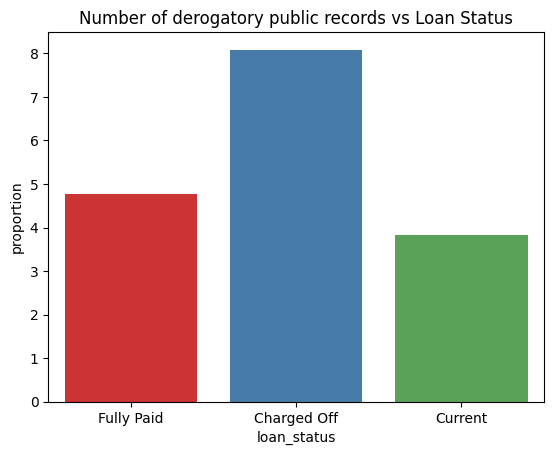

In [ ]:
# pub_rec is the number, which shows the number of Number of derogatory public records
loan['pub_rec1'] = loan['pub_rec'].apply(lambda x: 1 if x > 0 else 0)

loan_per_loanstatus_pub_rec1 = loan.groupby(['loan_status'])['pub_rec1'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_pub_rec1 ['proportion'] = loan_per_loanstatus_pub_rec1 ['proportion'] * 100
loan_per_loanstatus_pub_rec1  = loan_per_loanstatus_pub_rec1[loan_per_loanstatus_pub_rec1 ['pub_rec1'] > 0]

sns.barplot(x='loan_status', y = 'proportion',
            data=loan_per_loanstatus_pub_rec1, palette='Set1',
            order = ['Fully Paid', 'Charged Off', 'Current'])
plt.title("Number of derogatory public records vs Loan Status")
plt.show()

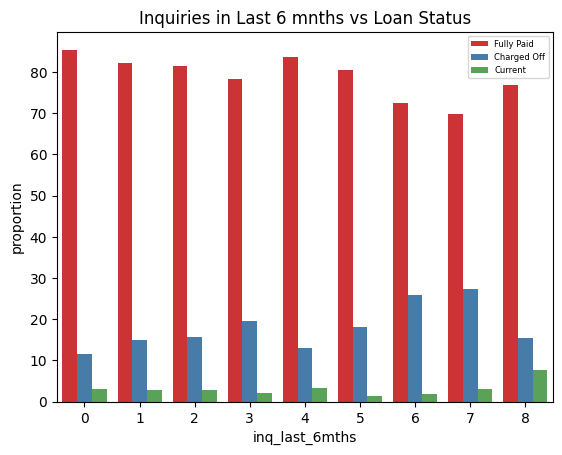

In [ ]:
# inq_last_6mths is the fields which shows the The number of inquiries made by applicant in past 6 months
loan_per_loanstatus_inq_last_6mths = loan.groupby(['inq_last_6mths'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_inq_last_6mths ['proportion'] = loan_per_loanstatus_inq_last_6mths ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(hue='loan_status', x='inq_last_6mths', y = 'proportion', data=loan_per_loanstatus_inq_last_6mths, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.title("Inquiries in Last 6 mnths vs Loan Status")
plt.show()

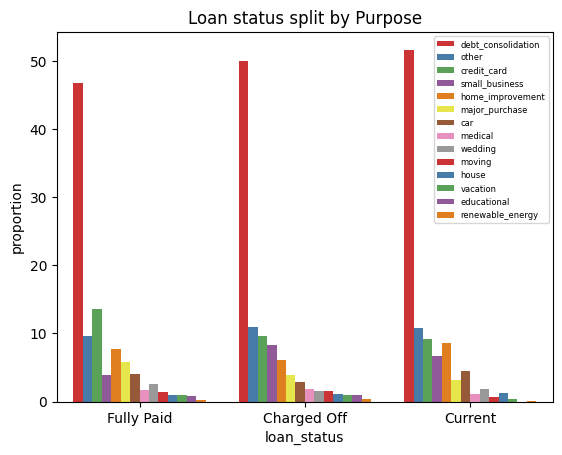

In [ ]:
#purpose of the loan
loan_per_loanstatus_purpose = loan.groupby(['loan_status'])['purpose'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_purpose ['proportion'] = loan_per_loanstatus_purpose ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(x='loan_status', hue='purpose', y = 'proportion', data=loan_per_loanstatus_purpose, palette='Set1',
            order=['Fully Paid', 'Charged Off', 'Current'])
plt.legend(fontsize='6', loc='upper right')
plt.title("Loan status split by Purpose")
plt.show()

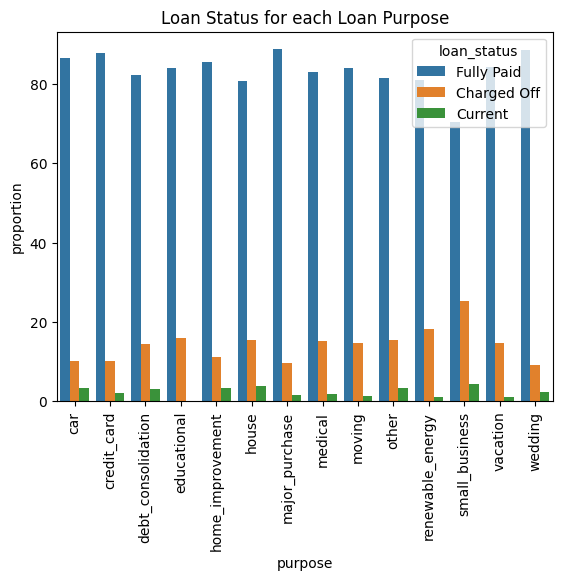

In [ ]:
#purpose: purpose of the loan
loan_per_loanstatus_purpose = loan.groupby(['purpose'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_purpose ['proportion'] = loan_per_loanstatus_purpose ['proportion'] * 100
# plt.figure(figsize=(20,10))
# print(loan_per)
sns.barplot(hue='loan_status', x='purpose', y='proportion', data=loan_per_loanstatus_purpose ,
             hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.xticks(rotation=90)
plt.title("Loan Status for each Loan Purpose")
plt.show()

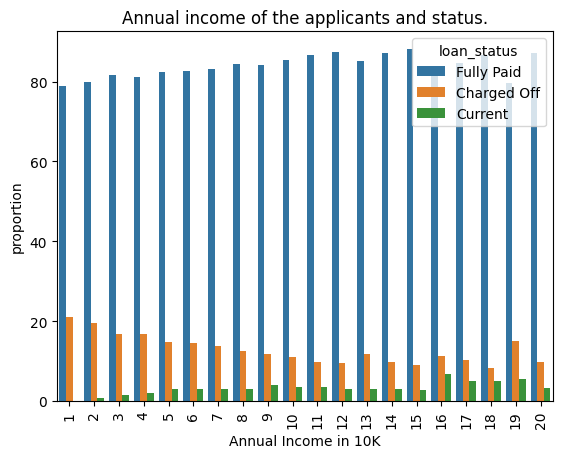

In [ ]:
# annual_inc: No significant difference due to this
bins = [0,10000,20000,30000,40000,50000, 60000, 70000,80000,90000, 100000,110000,
        120000,130000,140000,150000,160000,170000,180000,190000]  # Define bin edges
loan['annual_inc_bin'] = np.digitize(loan['annual_inc'], bins)


loan_per_loanstatus_annual_inc = loan.groupby(['annual_inc_bin'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_annual_inc ['proportion'] = loan_per_loanstatus_annual_inc ['proportion'] * 100


sns.barplot(hue='loan_status', x='annual_inc_bin', y='proportion', data=loan_per_loanstatus_annual_inc ,
             hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.xticks(rotation=90)
plt.xlabel("Annual Income in 10K")
plt.title("Annual income of the applicants and status.")
plt.show()

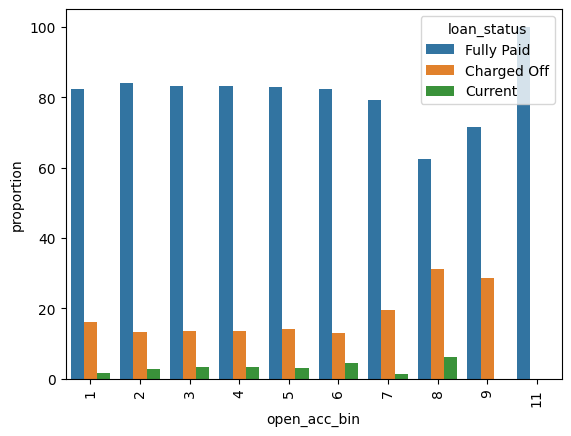

In [ ]:
# open_acc :The number of open credit lines in the borrower's credit file.
# This field made into bins and analized against the loan status
bins = np.linspace(0, 48, 12)
loan['open_acc_bin'] = np.digitize(loan['open_acc'], bins)

loan_per_loanstatus_open_acct = loan.groupby(['open_acc_bin'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_open_acct ['proportion'] = loan_per_loanstatus_open_acct ['proportion'] * 100


sns.barplot(hue='loan_status', x='open_acc_bin', y='proportion', data=loan_per_loanstatus_open_acct ,
             hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.xticks(rotation=90)
labels = ['1-4','5-8','9-12','13-16','17-20','21-24','25-28','29-32','33-36','37-40',
          '41-44','45-48']
# plt.xticks(range(12), labels)
plt.title("Open Credit Lines of diff. loan status")
plt.show()

##### 5.2. Analyze: Univariate and Bi-variate: Columns with not the best linkage to loan default

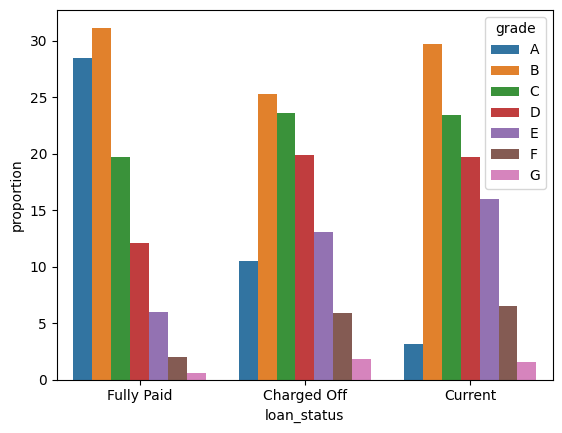

In [ ]:
# additional grade analysis - good ones are in section 5.1
loan_per_loanstatus_grade = loan.groupby(['loan_status'])['grade'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_grade ['proportion'] = loan_per_loanstatus_grade ['proportion'] * 100

# print(loan_per)
sns.barplot(x='loan_status', hue='grade', y='proportion', data=
            loan_per_loanstatus_grade , hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], order=['Fully Paid', 'Charged Off', 'Current'])
plt.show()

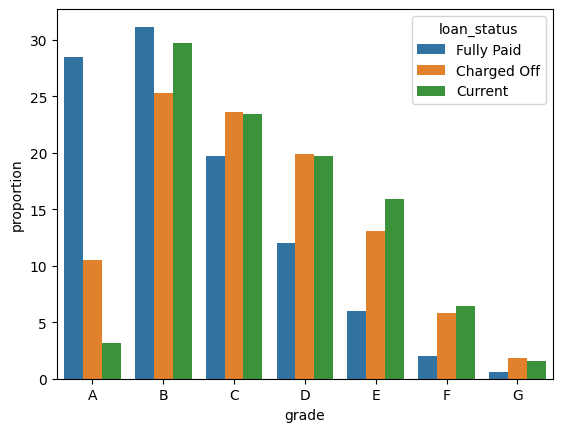

In [ ]:
# additional grade analysis - good ones are in section 5.1
loan_per_loanstatus_grade = loan.groupby(['loan_status'])['grade'].value_counts(normalize
                                                                                =True).reset_index()
loan_per_loanstatus_grade ['proportion'] = loan_per_loanstatus_grade ['proportion'] * 100

# print(loan_per)
sns.barplot(hue='loan_status', x='grade', y='proportion', data=loan_per_loanstatus_grade ,
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.show()

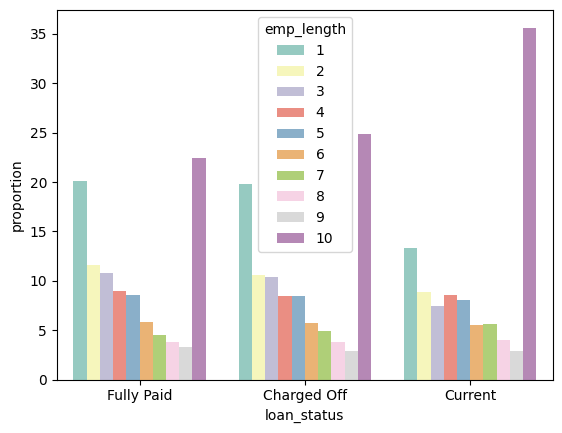

In [ ]:
# emp_length: Duration of employment. Not a strong co-relation and hence not considered
loan_per_loanstatus_emp_length = loan.groupby(['loan_status'])['emp_length'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_emp_length ['proportion'] = loan_per_loanstatus_emp_length ['proportion'] * 100

# print(loan_per_loanstatus_homeO)
sns.barplot(x='loan_status', hue='emp_length', y='proportion', data=loan_per_loanstatus_emp_length,
            order=['Fully Paid', 'Charged Off', 'Current'], palette="Set3")
plt.show()

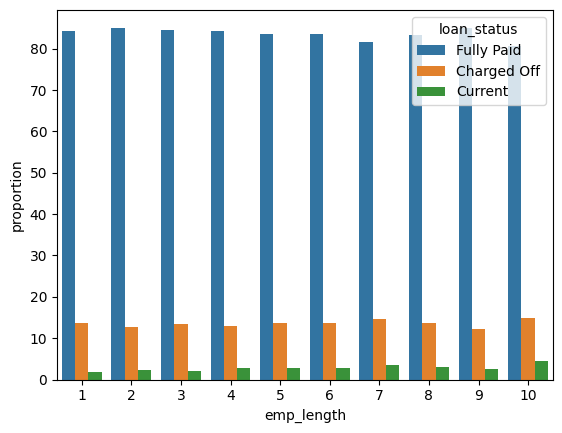

In [ ]:
# emp_length: Duration of employment. Not a strong co-relation and hence not considered
loan_per_loanstatus_emp_length = loan.groupby(['emp_length'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_emp_length ['proportion'] = loan_per_loanstatus_emp_length ['proportion'] * 100

# print(loan_per_loanstatus_homeO)
sns.barplot(x='emp_length', hue='loan_status', y='proportion', data=loan_per_loanstatus_emp_length)

plt.show()

<Axes: xlabel='loan_status', ylabel='dti'>

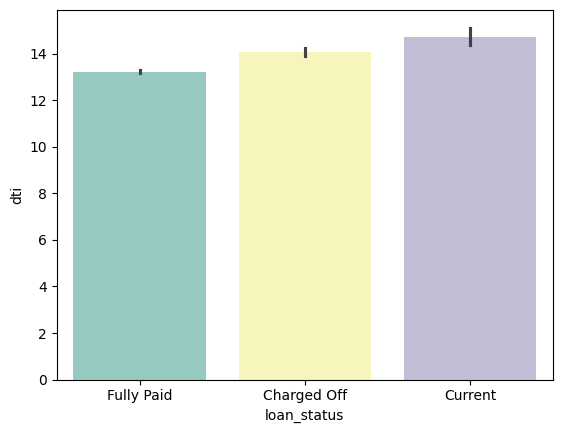

In [ ]:
# dti: debt to income ratio. Not a strong co-relation and hence not considered
sns.barplot(y='dti', x='loan_status', data=loan, palette='Set3')

<Axes: xlabel='loan_status', ylabel='revol_bal'>

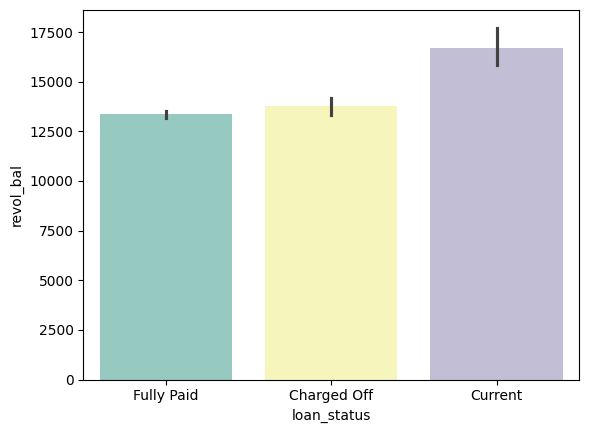

In [ ]:
# revol_bal: total Revolving balance: revol_bal to income derived field is giving better results.
# Hence this field is not considered
sns.barplot(y='revol_bal', x='loan_status', data=loan, palette='Set3')

<Axes: xlabel='loan_status', ylabel='revol_util'>

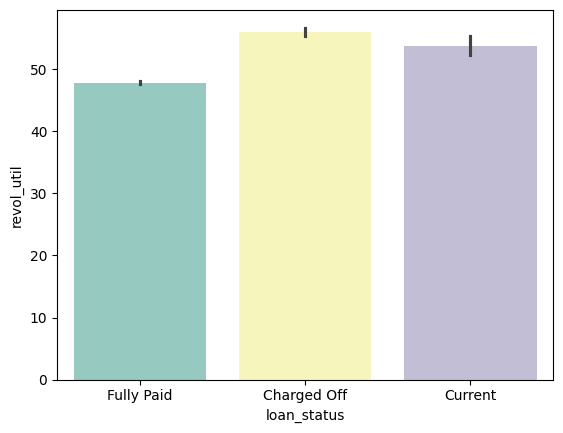

In [ ]:
# revol_util: This is the utliization of revolving balance. We have used derived field
# of revolving balance * revol_util / income. This derived field is giving better
# results.
sns.barplot(y='revol_util', x='loan_status', data=loan, palette='Set3')

<Axes: xlabel='loan_status', ylabel='total_acc'>

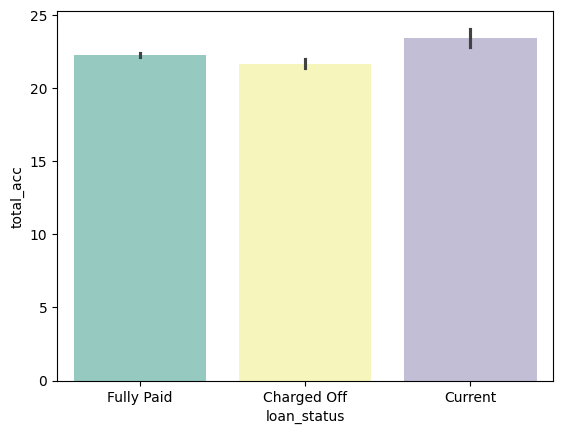

In [ ]:
# total_acc: The total number of credit lines currently in the borrower's credit file
# No key correlation found
sns.barplot(y='total_acc', x='loan_status', data=loan, palette='Set3')

   loan_status verification_status  proportion
0  Charged Off            Verified   37.057011
1  Charged Off        Not Verified   36.402157
2  Charged Off     Source Verified   26.540832
3      Current            Verified   52.962625
4      Current     Source Verified   26.982680
5      Current        Not Verified   20.054695
6   Fully Paid        Not Verified   43.231649
7   Fully Paid            Verified   31.118526
8   Fully Paid     Source Verified   25.649825


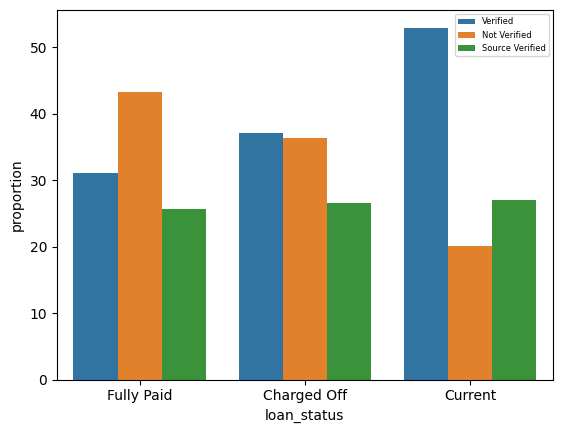

In [ ]:
# verification_status: This is strange as fully paid have lower verified loan.
loan_per_loanstatus_verified = loan.groupby(['loan_status'])['verification_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_verified ['proportion'] = loan_per_loanstatus_verified ['proportion'] * 100


print(loan_per_loanstatus_verified)
sns.barplot(x='loan_status', hue='verification_status', y='proportion',
            data=loan_per_loanstatus_verified, order = ['Fully Paid', 'Charged Off', 'Current'])
plt.legend(fontsize='6', loc='upper right')
plt.show()

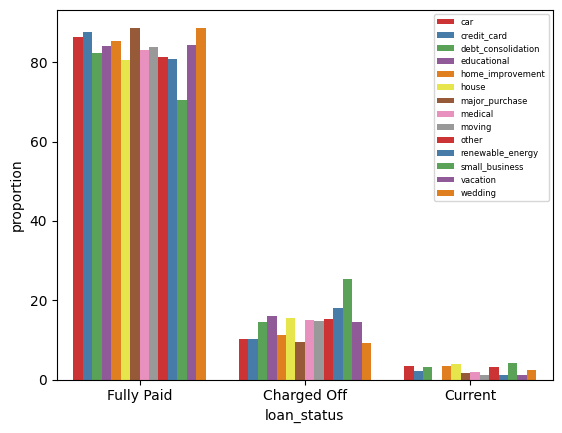

In [ ]:
# prupose: better analysis is in section 5.1
loan_per_loanstatus_purpose = loan.groupby(['purpose'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_purpose ['proportion'] = loan_per_loanstatus_purpose ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(x='loan_status', hue='purpose', y = 'proportion', data=loan_per_loanstatus_purpose, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.show()

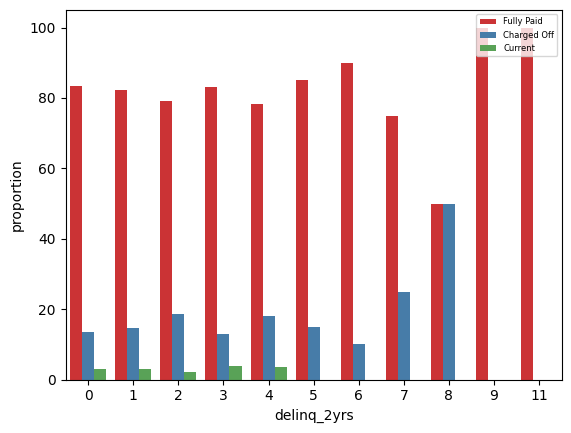

In [ ]:
#delinq_2yrs: No clear correlation with this field to loan default. Hence not considered
loan_per_loanstatus_delinq_2yrs = loan.groupby(['delinq_2yrs'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_delinq_2yrs ['proportion'] = loan_per_loanstatus_delinq_2yrs ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(hue='loan_status', x='delinq_2yrs', y = 'proportion', data=loan_per_loanstatus_delinq_2yrs, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.show()

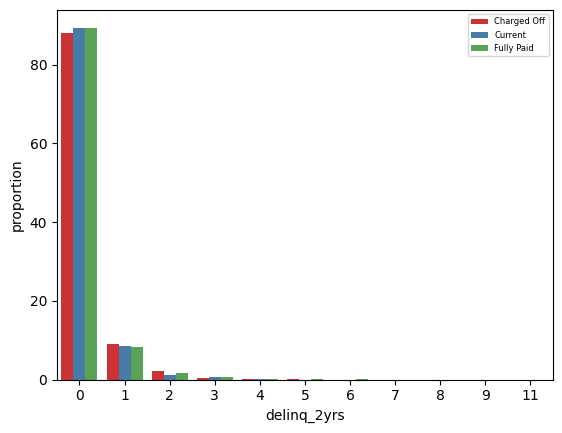

In [ ]:
#delinq_2yrs: No clear correlation with this field to loan default. Hence not considered
loan_per_loanstatus_delinq_2yrs = loan.groupby(['loan_status'])['delinq_2yrs'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_delinq_2yrs ['proportion'] = loan_per_loanstatus_delinq_2yrs ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(hue='loan_status', x='delinq_2yrs', y = 'proportion', data=loan_per_loanstatus_delinq_2yrs, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.show()

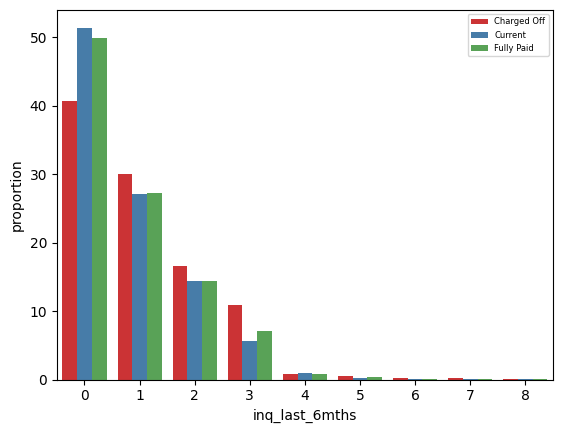

In [ ]:
# inq_last_6mths: better analysis for this field is in section 5.1
loan_per_loanstatus_inq_last_6mths = loan.groupby(['loan_status'])['inq_last_6mths'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_inq_last_6mths ['proportion'] = loan_per_loanstatus_inq_last_6mths ['proportion'] * 100
# print(loan_per_loanstatus_purpose)
sns.barplot(hue='loan_status', x='inq_last_6mths', y = 'proportion', data=loan_per_loanstatus_inq_last_6mths, palette='Set1')
plt.legend(fontsize='6', loc='upper right')
plt.show()

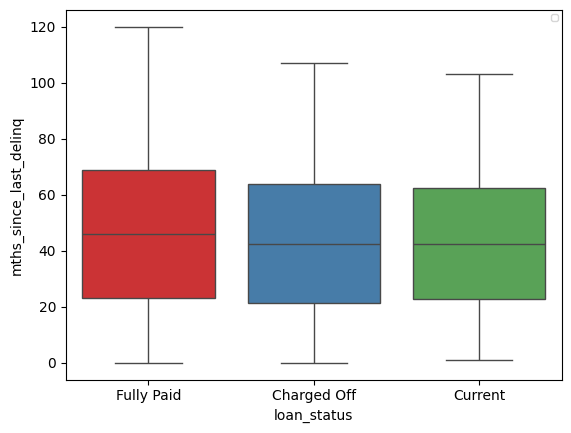

In [ ]:
#mths_since_last_delinq: No clear correlation with this field to loan default. Hence not considered
loan_per_loanstatus_mths_since_last_delinq = loan.groupby(['mths_since_last_delinq'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_mths_since_last_delinq ['proportion'] = loan_per_loanstatus_mths_since_last_delinq ['proportion'] * 100
loan_per_loanstatus_mths_since_last_delinq =  loan_per_loanstatus_mths_since_last_delinq[
     loan_per_loanstatus_mths_since_last_delinq['mths_since_last_delinq'] >= 0]
# print(loan_per_loanstatus_purpose)
sns.boxplot(x='loan_status', y='mths_since_last_delinq', data=loan_per_loanstatus_mths_since_last_delinq, palette='Set1')
# plt.legend(fontsize='6', loc='upper right')
plt.show()


In [ ]:
# recoveries: We can ignore this field as this is an effect of being charged off
# or being a defaulter.

loan_per_loanstatus_recoveries = loan.groupby(['loan_status'])['recoveries'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_recoveries ['proportion'] = loan_per_loanstatus_recoveries ['proportion'] * 100
loan_per_loanstatus_recoveries[loan_per_loanstatus_recoveries['loan_status']!='Charged Off']
# sns.barplot(hue='loan_status', x='recoveries', y = 'proportion', data=loan_per_loanstatus_recoveries, palette='Set1')
# plt.legend(fontsize='6', loc='upper right')
# plt.show()

,loan_status,recoveries,proportion
3772,Current,0.0,100.0
3773,Fully Paid,0.0,100.0


In [ ]:
# collection_recovery_fee: We can ignore this field as this is an effect of being charged off.
# or being a defaulter.
loan_per_loanstatus_collection_recovery_fee = loan.groupby(['loan_status'])['collection_recovery_fee'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_recoveries ['proportion'] = loan_per_loanstatus_collection_recovery_fee ['proportion'] * 100
loan_per_loanstatus_collection_recovery_fee[loan_per_loanstatus_collection_recovery_fee['loan_status']!='Charged Off']

,loan_status,collection_recovery_fee,proportion
2480,Current,0.0,1.0
2481,Fully Paid,0.0,1.0


<Axes: xlabel='loan_status', ylabel='annual_inc'>

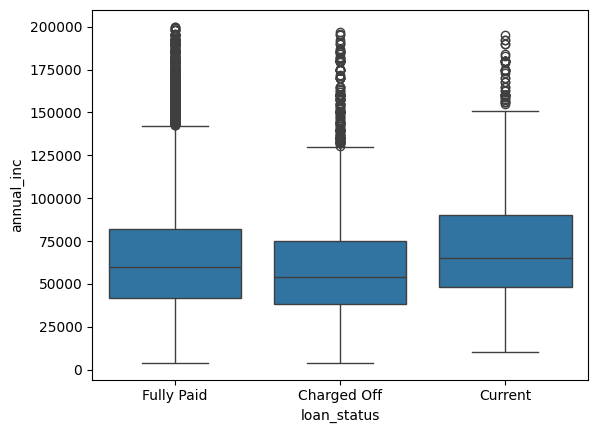

In [ ]:
# annual_inc: No significant difference due to this
loan1 = loan
loan1['annual_inc'] = loan1['annual_inc'][loan1['annual_inc'] < 200000]
sns.boxplot(x='loan_status', y='annual_inc', data=loan1)


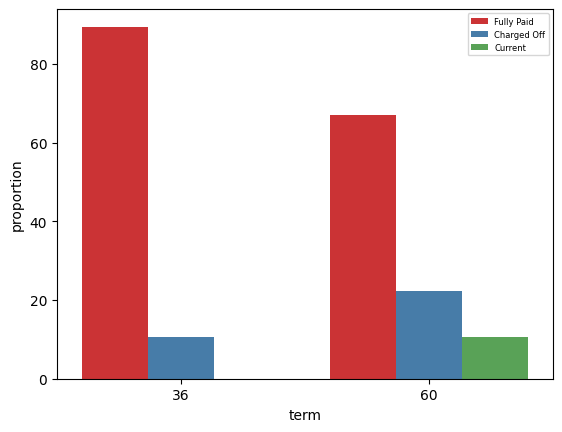

In [ ]:
# term: better analysis for this field is in section 5.1
loan_per_loanstatus_term = loan.groupby(['term'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_term ['proportion'] = loan_per_loanstatus_term ['proportion'] * 100

sns.barplot(hue='loan_status', x='term', y = 'proportion', data=loan_per_loanstatus_term, palette='Set1',
            hue_order = ['Fully Paid', 'Charged Off', 'Current'])
plt.legend(fontsize='6', loc='upper right')
plt.show()

<Axes: xlabel='loan_status', ylabel='installment'>

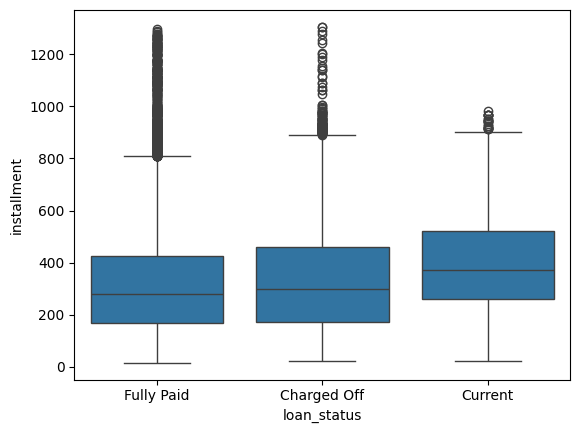

In [ ]:
# installment:  No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='installment', data=loan)

<Axes: xlabel='annual_inc', ylabel='installment'>

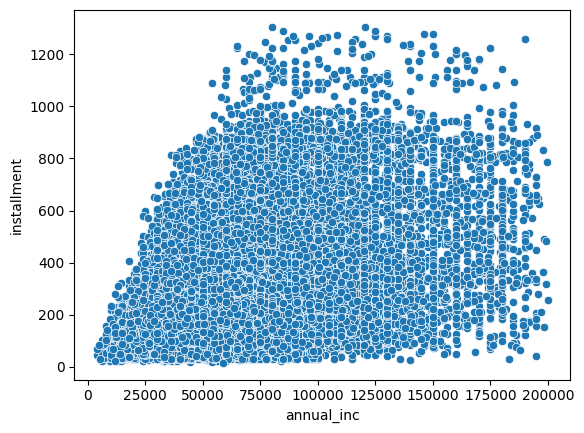

In [ ]:
# installment:  No clear correlation with this field to loan default. Hence not considered
sns.scatterplot(x='annual_inc', y='installment', data=loan)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

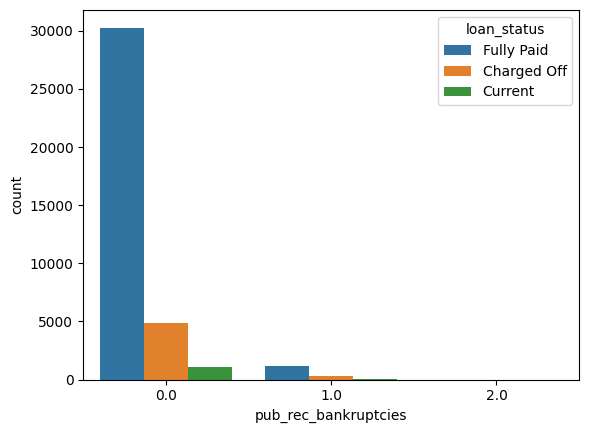

In [ ]:
# pub_rec_bankruptcies: better analysis for this field is in section 5.1

sns.countplot(hue='loan_status', x='pub_rec_bankruptcies', data=loan)

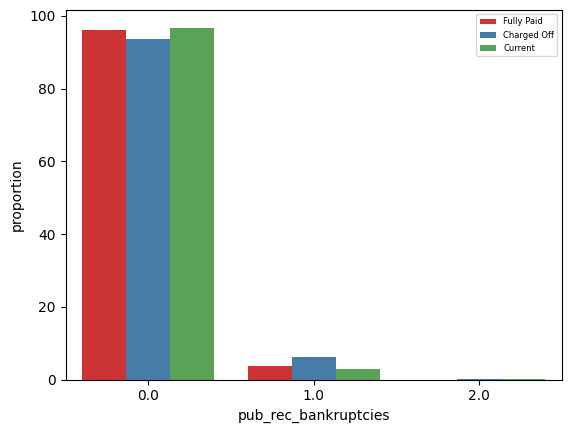

In [ ]:
# pub_rec_bankruptcies: better analysis for this field is in section 5.1
loan_per_loanstatus_pub_rec_bankruptcies = loan.groupby(['loan_status'])['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_pub_rec_bankruptcies ['proportion'] = loan_per_loanstatus_pub_rec_bankruptcies ['proportion'] * 100

sns.barplot(hue='loan_status', x='pub_rec_bankruptcies', y = 'proportion', data=loan_per_loanstatus_pub_rec_bankruptcies, palette='Set1',
            hue_order = ['Fully Paid', 'Charged Off', 'Current'])
plt.legend(fontsize='6', loc='upper right')
plt.show()

<Axes: xlabel='pub_rec', ylabel='count'>

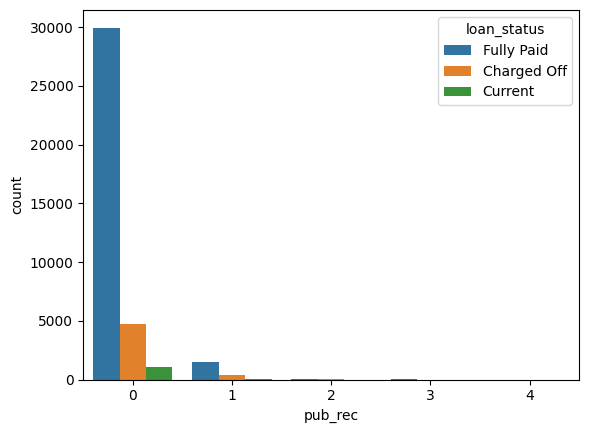

In [ ]:
# pub_rec: better analysis for this field is in section 5.1
sns.countplot(hue='loan_status', x='pub_rec', data=loan)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

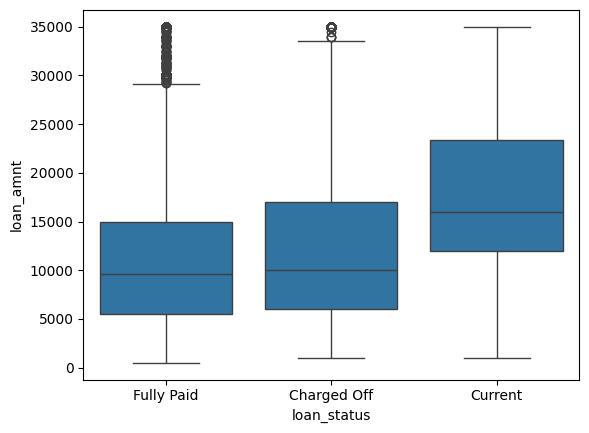

In [ ]:
# loan_amnt: No clear correlation with this field to loan default. Hence not considered
# Loan amount to income ratio has been derived and that has a better correlation
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)

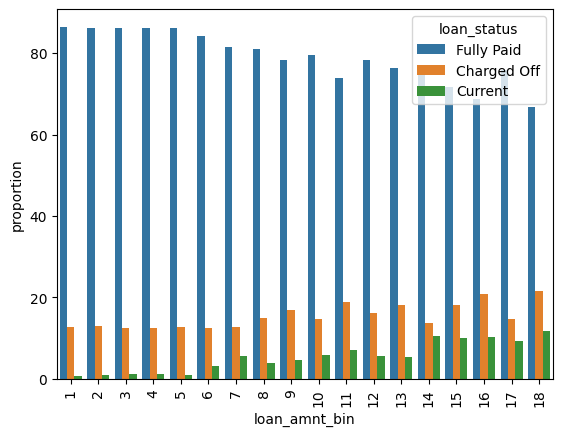

In [ ]:
# annual_inc: No significant difference due to this
# bins = [0,2000,4000,6000,8000,10000, 12000, 14000, 16000, 18000, 20000, 22000,
#         24000, 26000,14000,15000,20000]  # Define bin edges

bins = np.linspace(0, 35000, 18)
loan['loan_amnt_bin'] = np.digitize(loan['loan_amnt'], bins)


loan_per_loanstatus_loan_amnt = loan.groupby(['loan_amnt_bin'])['loan_status'].value_counts(normalize=True).reset_index()
loan_per_loanstatus_loan_amnt ['proportion'] = loan_per_loanstatus_loan_amnt ['proportion'] * 100


sns.barplot(hue='loan_status', x='loan_amnt_bin', y='proportion', data=loan_per_loanstatus_loan_amnt ,
             hue_order=['Fully Paid', 'Charged Off', 'Current'])
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

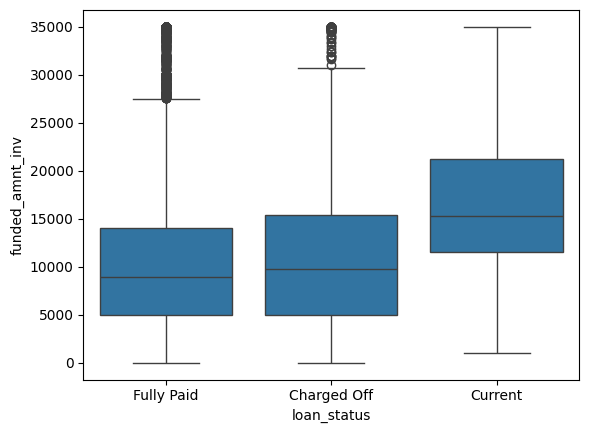

In [ ]:
# funded_amnt_inv: No clear correlation with this field to loan default. Hence not considered

sns.boxplot(x='loan_status', y='funded_amnt_inv', data=loan)

<Axes: xlabel='loan_status', ylabel='total_pymnt_inv'>

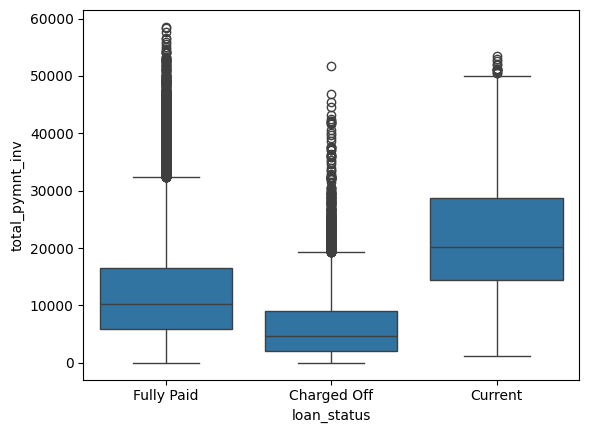

In [ ]:
# total_pymnt_inv: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='total_pymnt_inv', data=loan)

<Axes: xlabel='loan_status', ylabel='total_rec_prncp'>

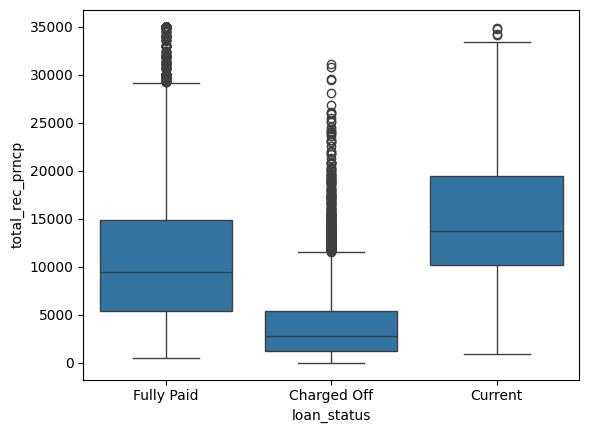

In [ ]:
# total_rec_prncp: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='total_rec_prncp', data=loan)

<Axes: xlabel='loan_status', ylabel='total_rec_int'>

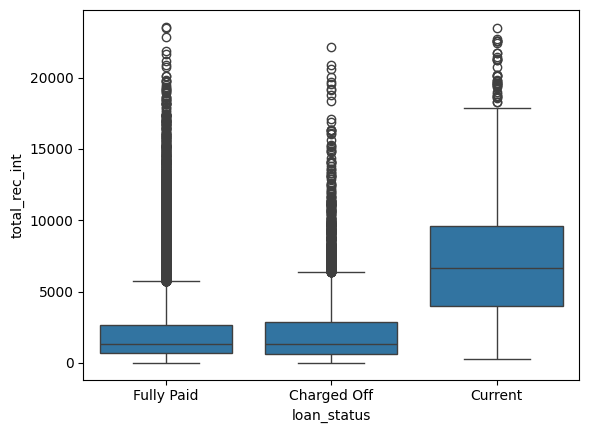

In [ ]:
# total_rec_int: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='total_rec_int', data=loan)

<Axes: xlabel='loan_status', ylabel='total_rec_int_income'>

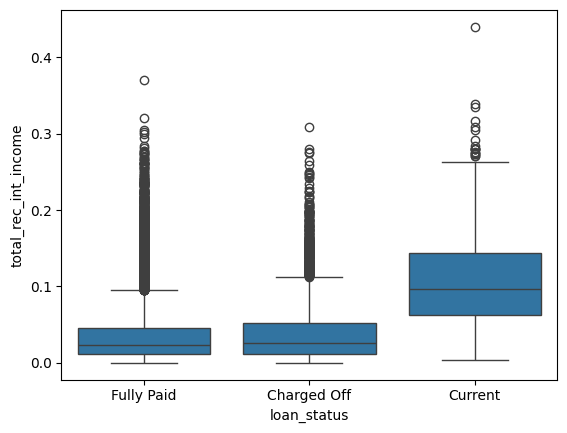

In [ ]:
# total_rec_int: No clear correlation with this field to loan default. Hence not considered
loan['total_rec_int_income'] = loan['total_rec_int'] / loan['annual_inc']
sns.boxplot(x='loan_status', y='total_rec_int_income', data=loan)

<Axes: xlabel='loan_status', ylabel='last_pymnt_amnt'>

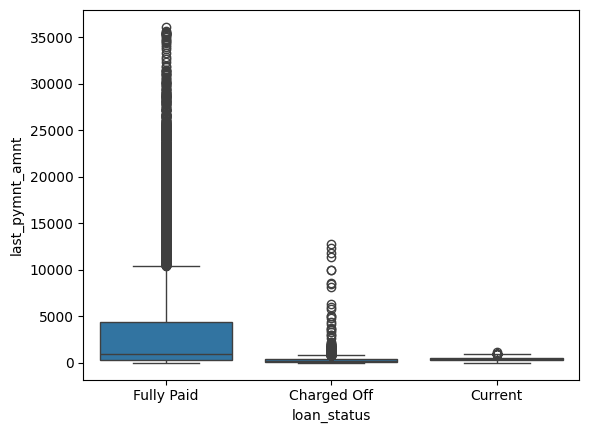

In [ ]:
# last_pymnt_amnt: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='last_pymnt_amnt', data=loan)

<Axes: xlabel='loan_status', ylabel='installment_to_income_ratio'>

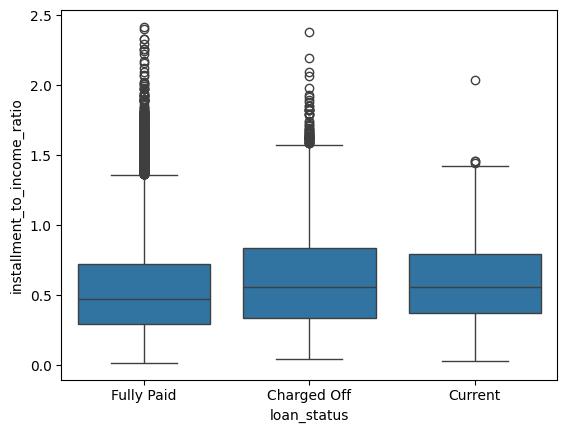

In [ ]:
# installment to income ratio: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='installment_to_income_ratio', data=loan, palette='Set1')
plt.title("installment to income ratio")


Text(0.5, 1.0, 'term vs Loan Status')

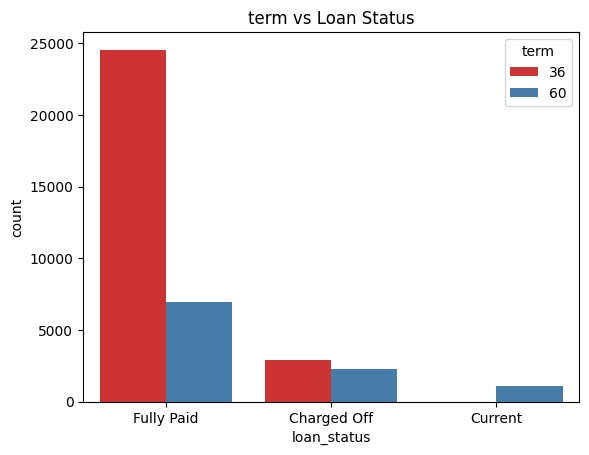

In [ ]:
# term: 60 months is more likely to default: Better analysis already considered in 5.1
sns.countplot(x='loan_status', hue='term', data=loan, palette='Set1')
plt.title("term vs Loan Status")

<Axes: xlabel='loan_status', ylabel='out_prncp'>

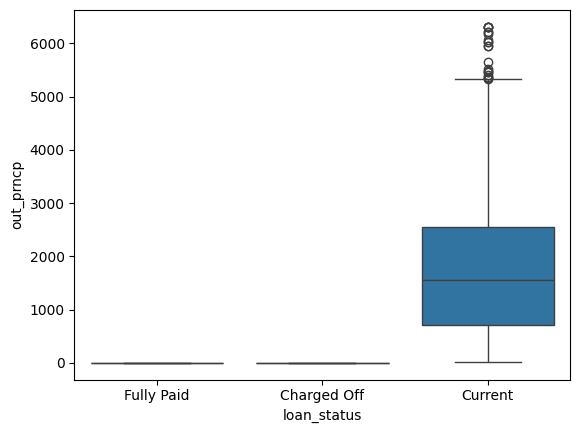

In [ ]:
# out_prncp: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='out_prncp', data=loan)

# bins = np.linspace(0, 35000, 18)
# loan['loan_amnt_bin'] = np.digitize(loan['loan_amnt'], bins)


# loan_per_loanstatus_loan_amnt = loan.groupby(['loan_amnt_bin'])['loan_status'].value_counts(normalize=True).reset_index()
# loan_per_loanstatus_loan_amnt ['proportion'] = loan_per_loanstatus_loan_amnt ['proportion'] * 100


# sns.barplot(hue='loan_status', x='loan_amnt_bin', y='proportion', data=loan_per_loanstatus_loan_amnt ,
#              hue_order=['Fully Paid', 'Charged Off', 'Current'])
# plt.xticks(rotation=90)

# plt.show()


<Axes: xlabel='loan_status', ylabel='out_prncp_inv'>

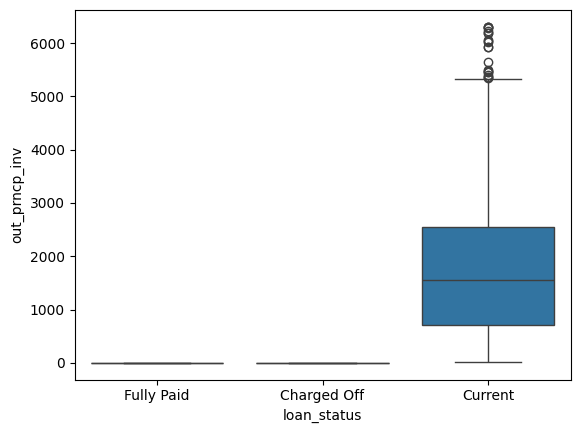

In [ ]:
# out_prncp_inv: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='out_prncp_inv', data=loan)


<Axes: xlabel='loan_status', ylabel='total_pymnt'>

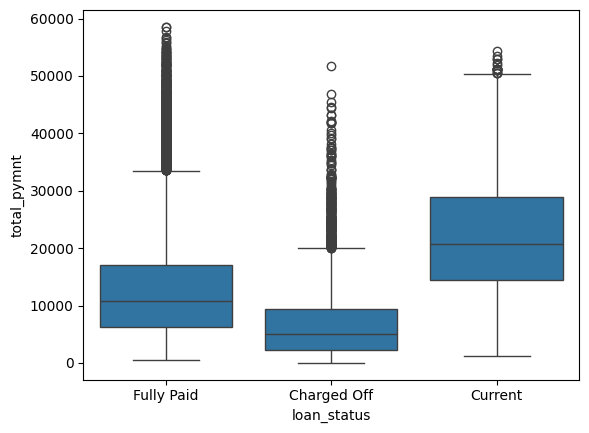

In [ ]:
# total_pymnt: No clear correlation with this field to loan default. Hence not considered
sns.boxplot(x='loan_status', y='total_pymnt', data=loan)


<Axes: xlabel='loan_status', ylabel='total_rec_late_fee_not_zero'>

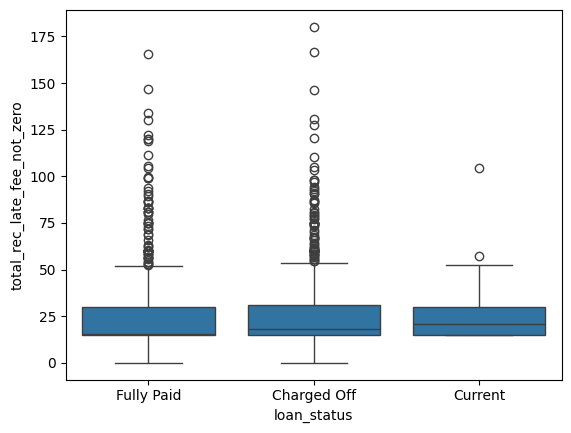

In [ ]:
# total_rec_late_fee: No clear correlation with this field to loan default. Hence not considered
loan['total_rec_late_fee_not_zero'] = loan['total_rec_late_fee'][loan['total_rec_late_fee'] > 0]
sns.boxplot(x='loan_status', y='total_rec_late_fee_not_zero', data=loan)


##### 5.3 Analyze: Correlation Coeff

In [ ]:
loan.drop('Unnamed: 0', axis=1, inplace=True)
loan['loan_statusInt'].head()

,loan_statusInt
0,0
1,1
2,0
3,0
4,0


In [ ]:
loan_charged = loan[loan['loan_status'] == 'Charged Off']

In [ ]:
# running first check of the correlation Coefficients and getting high (<0.2- and > 0.2)
# loan_corr = loan_charged.corr(numeric_only=True)
loan_corr_charged = loan_charged.corr(numeric_only=True)
loan_corr_charged

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,gradeInt,sub_gradeInt,loan_statusInt,home_ownershipInt,loan_to_income_ratio,rev_bal_to_income_ratio,rev_bal_util_to_income_ratio
id,1.000000,0.993789,0.175648,0.191480,0.286907,0.274133,0.189892,0.113248,0.103049,0.000555,0.097670,0.013595,-0.052660,-0.024339,0.027760,-0.056136,-0.017711,0.103696,0.023573,NaN,NaN,0.145562,0.201731,0.072144,0.216118,-0.085186,0.072146,-0.046581,0.033894,-0.030254,0.054625,0.055377,NaN,0.015600,0.140567,-0.021084,0.018863
member_id,0.993789,1.000000,0.172696,0.188379,0.294699,0.298137,0.190837,0.104012,0.107241,-0.000242,0.097437,0.015636,-0.055747,-0.021204,0.021541,-0.054929,-0.025814,0.102989,0.021775,NaN,NaN,0.145298,0.207649,0.071676,0.218174,-0.086558,0.069180,-0.050625,0.030549,-0.027257,0.060514,0.061461,NaN,0.020850,0.139519,-0.029625,0.011890
loan_amnt,0.175648,0.172696,1.000000,0.978167,0.928412,0.393459,0.353004,0.923790,0.193958,0.348675,0.067771,-0.024476,0.004334,-0.049402,0.173158,-0.038519,0.308667,0.046092,0.279333,NaN,NaN,0.679030,0.651959,0.544628,0.700149,0.085303,0.313567,0.159441,0.324334,-0.015406,0.328067,0.334020,NaN,0.134311,0.622417,0.134001,0.115195
funded_amnt,0.191480,0.188379,0.978167,1.000000,0.951334,0.376847,0.356771,0.952893,0.198318,0.343256,0.064804,-0.022433,0.003637,-0.045925,0.170372,-0.043489,0.291985,0.051256,0.270813,NaN,NaN,0.698143,0.672136,0.564148,0.715087,0.092201,0.319857,0.166292,0.330306,-0.020993,0.329542,0.334878,NaN,0.129648,0.609240,0.122151,0.110494
funded_amnt_inv,0.286907,0.294699,0.928412,0.951334,1.000000,0.408464,0.363902,0.890523,0.200995,0.323483,0.069002,-0.020995,-0.011231,-0.039976,0.149925,-0.049845,0.255110,0.062243,0.250364,NaN,NaN,0.698154,0.719844,0.562818,0.723904,0.074964,0.310038,0.146737,0.293432,-0.025941,0.318125,0.323946,NaN,0.125238,0.582150,0.098434,0.098322
term,0.274133,0.298137,0.393459,0.376847,0.408464,1.000000,0.452838,0.135787,0.139426,0.080903,0.065096,-0.004845,0.000693,0.003628,0.058861,-0.000893,0.068933,0.033081,0.114828,NaN,NaN,0.264277,0.280179,0.088258,0.458206,-0.026362,0.130217,0.004136,0.044871,0.026453,0.415669,0.423755,NaN,0.096583,0.314888,0.027096,0.040983
int_rate,0.189892,0.190837,0.353004,0.356771,0.363902,0.452838,1.000000,0.333157,0.041523,0.135624,0.038602,0.125035,0.064137,0.120253,0.038851,0.079855,0.076088,0.380168,-0.012623,NaN,NaN,0.266783,0.271669,0.068405,0.472640,0.061345,0.163050,0.074263,0.094955,0.075724,0.949770,0.959921,NaN,-0.003207,0.195757,-0.020117,0.131456
installment,0.113248,0.104012,0.923790,0.952893,0.890523,0.135787,0.333157,1.000000,0.166138,0.354661,0.046290,-0.008671,0.012807,-0.031281,0.167325,-0.031462,0.295214,0.081641,0.248305,NaN,NaN,0.667807,0.635458,0.573386,0.632558,0.116631,0.304802,0.188238,0.343094,-0.014369,0.317590,0.321794,NaN,0.104712,0.549856,0.118722,0.117300
emp_length,0.103049,0.107241,0.193958,0.198318,0.200995,0.139426,0.041523,0.166138,1.000000,0.132802,0.056361,0.013132,0.011412,0.031451,0.099539,0.063744,0.141077,0.035279,0.181019,NaN,NaN,0.162543,0.165524,0.133925,0.172975,-0.031228,0.059406,0.011385,0.038760,0.057036,0.030130,0.032254,NaN,0.177217,0.034926,0.076812,0.070144
annual_inc,0.000555,-0.000242,0.348675,0.343256,0.323483,0.080903,0.135624,0.354661,0.132802,1.000000,-0.089050,0.030966,0.033635,0.009395,0.207141,-0.000219,0.362501,0.071193,0.286672,NaN,NaN,0.277339,0.266828,0.234504,0.262028,0.060600,0.135740,0.089140,0.125279,0.003893,0.141763,0.142957,NaN,0.134807,-0.254728,-0.051005,-0.023409


In [ ]:
# running first check of the correlation Coefficients and getting high (<0.2- and > 0.2)
# loan_corr = loan_charged.corr(numeric_only=True)
loan_corr_org = loan.corr(numeric_only=True)
loan_corr_org['loan_statusInt']

,loan_statusInt
id,0.033767
member_id,0.032068
loan_amnt,0.051270
funded_amnt,0.048211
funded_amnt_inv,0.034412
term,0.152534
int_rate,0.198456
installment,0.023337
emp_length,0.013079
annual_inc,-0.039174


In [ ]:
# these fields have been considered in the manual analysis in section 5.1
high_corr = loan_corr_org['loan_statusInt'][(loan_corr_org['loan_statusInt'] > 0.1) | (loan_corr_org['loan_statusInt'] < -0.1)]
print(high_corr)

term                       0.152534
int_rate                   0.198456
total_pymnt               -0.233735
total_pymnt_inv           -0.232473
total_rec_prncp           -0.331047
total_rec_late_fee         0.166320
recoveries                 0.342823
collection_recovery_fee    0.205147
last_pymnt_amnt           -0.213305
gradeInt                   0.190675
sub_gradeInt               0.193662
loan_statusInt             1.000000
loan_to_income_ratio       0.109067
Name: loan_statusInt, dtype: float64


In [ ]:
# these fields is effect and not the cauase and hence we need to go field by field

<Axes: >

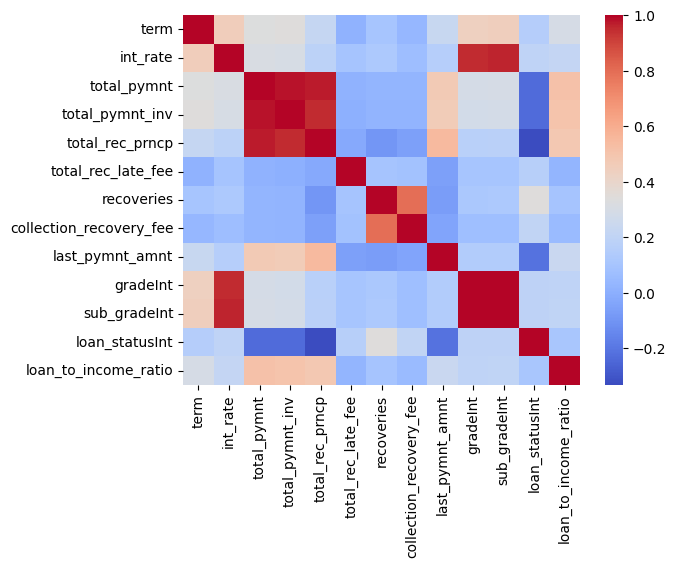

In [ ]:
sns.heatmap(loan[high_corr.index].corr(), annot=False, cmap='coolwarm')

#### 6. Recommend

*   Existing grading system that the company is aligned to an extend to Loan Defaults. However, this can be improved further. So that the loan is either denied to based on additional criteria or the interest rate is increased in proportion to the risk.
*   Home ownership has a clear bearing on the Loan Defaults with “Rental” home application have a higher % in charged off (loan defaults). Also, we notice that “Other” (which were the rows with empty value) have a high possibility of default
*   Impact of “Loan Amount to Income Ratio”, “Revolving balance to income ratio” and “Impact of Revolving line utilization rate” on Loan default is very high. This need to be factored in while planning whether to give loans or interest rate charged.
*   If the applicant is from AK, NV, SD and TN states, the loan defaults is highest. Hence the higher loan interest or higher rejection should be planned around that.
*   Annual Income: Observation is that loan defaults are decreasing with higher income i.e., defaults are Higher at lower income
*   Impact of Purpose on Loan Default:
  *   Debt consolidation is a high % of the Charged Off Status. Meaning if the purpose is Debt Consolidation, it has a higher default probability.
  *   We observe that ‘small business’ has a higher % of the Loan Defaults. This means that this category is to be flagged.
*   Impact of Loan Term: Logically, longer it is, the probability of the loan default increases. We can observe that 36 months has a lower % of defaults (Charged Off Status). 60 months has a higher likeliness of loan default.
*   Open Credit Line in the last 6 months, Publicly available bankruptcies on Loan Default, Impact of Derogatory public records and Inquiries in the last 6 months have a high bearing on the loan default. We need to consider these parameters to either plan for lower grade or reject the application.
